In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

In [3]:
orgfile=f'{bigDir}\signals_org_v4.csv'
newfile=f'{bigDir}\\new dataset\signals_new_v4.csv'
file=f'{bigDir}\signals_combined_v2.csv'

In [4]:
orgdata=pd.read_csv(orgfile)
newdata=pd.read_csv(newfile)
data=pd.read_csv(file)

# data visualizations - org dataset

In [5]:
orgdata=orgdata.drop(columns=['Unnamed: 0'])

In [6]:
orgdata.head()

file original cell name  Amy_mod  \
0  20190625_cell-01.czi           7L-E1(T)        0   
1  20190625_cell-02.czi           7L-E2(B)        0   
2  20190625_cell-03.czi           7L-E2(T)        0   
3  20190625_cell-05.czi              7L-G2        0   
4  20190625_cell-06.czi              7L-G3        0   

                         movie    x    y ab1 (heterochromatin)  ab1 ch  \
0  190619-cdc6-dhb-pcna002xy09  158  906                  HP1B       1   
1  190619-cdc6-dhb-pcna002xy09  832  252                  HP1B       1   
2  190619-cdc6-dhb-pcna002xy09  888  160                  HP1B       1   
3  190619-cdc6-dhb-pcna002xy09  172  324                  HP1B       1   
4  190619-cdc6-dhb-pcna002xy09  492  506                  HP1B       1   

  ab2 (MCM)  ab2 ch  ...  outer_DAPI_total  nuc_DAPI_het inner_DAPI_het  \
0      MCM3       2  ...      7.162939e+09  2.603415e+09   1.697959e+09   
1      MCM3       2  ...      7.431494e+09  2.648662e+09   1.905904e+09   
2      MCM3       2  ...      7.047608e+09  2.521722e+09   1.686519e+09   
3      MCM3       2  ...      1.280485e+10  5.093679e+09   3.586438e+09   
4      MCM3       2  ...      1.360591e+10  5.393420e+09   3.580233e+09   

  outer_DAPI_het   nuc_DAPI_eu inner_DAPI_eu  outer_DAPI_eu        day  \
0   9.054561e+08  7.968800e+09  1.711318e+09   6.257482e+09  d20190625   
1   7.427579e+08  8.502024e+09  1.813288e+09   6.688736e+09  d20190625   
2   8.352024e+08  7.953022e+09  1.740616e+09   6.212406e+09  d20190625   
3   1.507240e+09  1.652301e+10  5.225400e+09   1.129761e+10  d20190625   
4   1.813187e+09  1.762309e+10  5.830358e+09   1.179273e+10  d20190625   

       p_age  mol_age_mod  
0   0.666667     0.287517  
1   2.000000     0.431866  
2   2.000000     0.499777  
3  19.500000     1.479820  
4  18.833333     1.517313  

[5 rows x 68 columns]

In [7]:
orgdatasel=orgdata.loc[((orgdata.decon==True) & (orgdata['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [8]:
orgdatand=orgdata.loc[((orgdata.decon==False) & (orgdata['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [9]:
myTrendData=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

In [10]:
myTrendDatand=pd.DataFrame(columns=["trendName", "slope", "intercept", "rvalue", "pvalue", "stderr","rsquared"])

# deconvolved cells

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


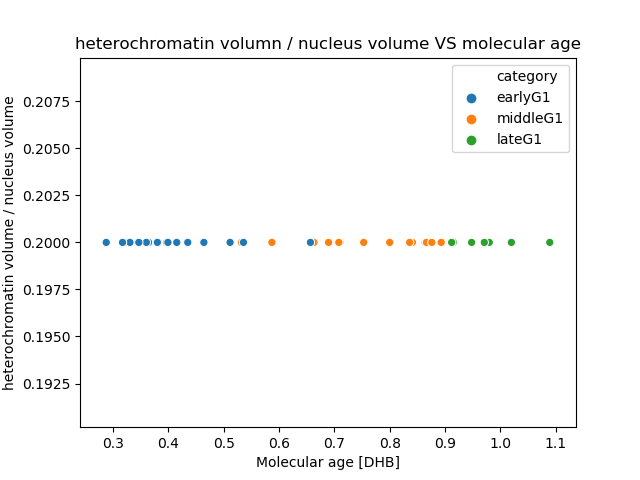

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [11]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_vol_het/orgdatasel.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


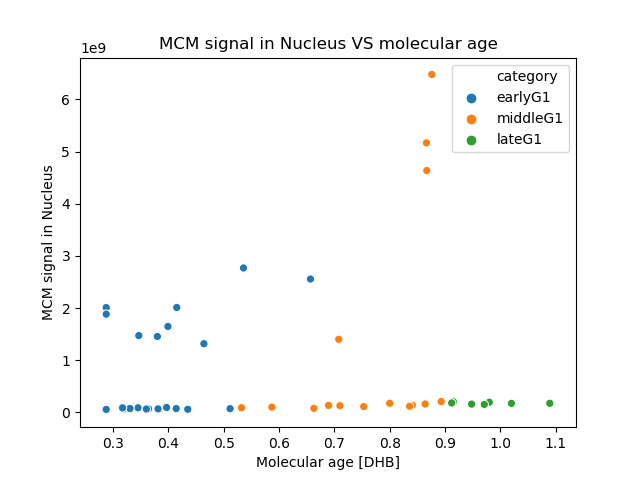

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [12]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


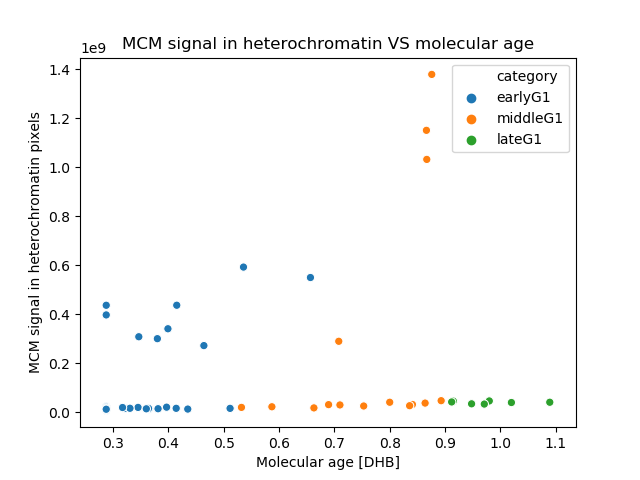

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [13]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


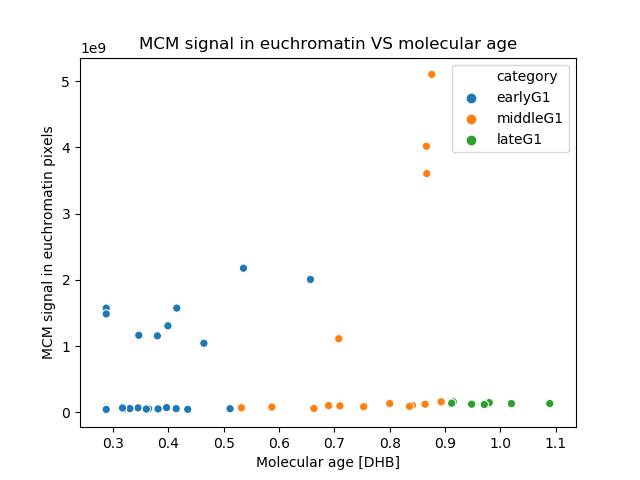

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [14]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


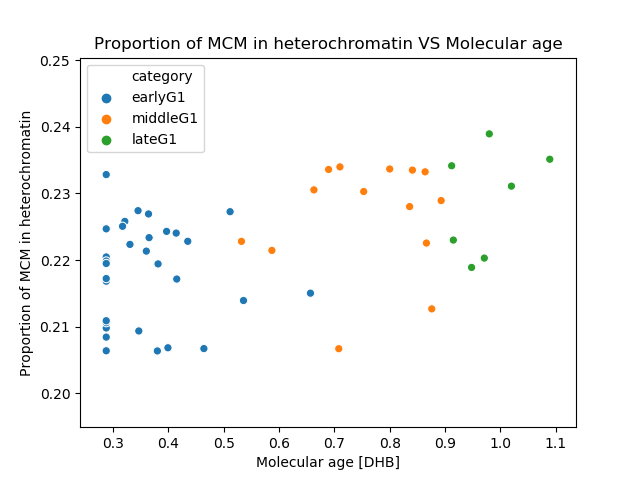

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [15]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_het/orgdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


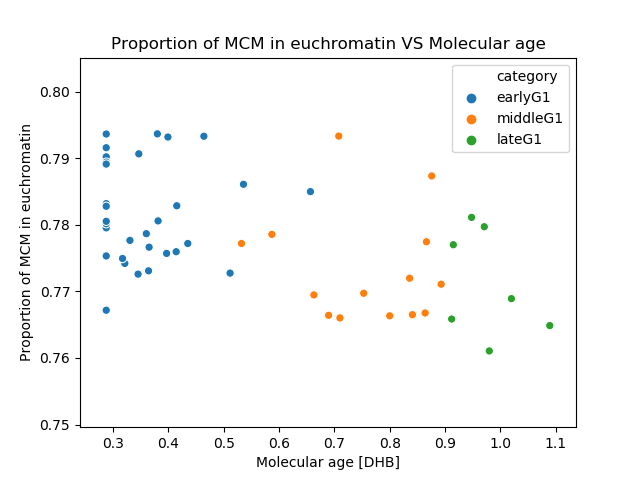

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [16]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_eu/orgdatasel.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


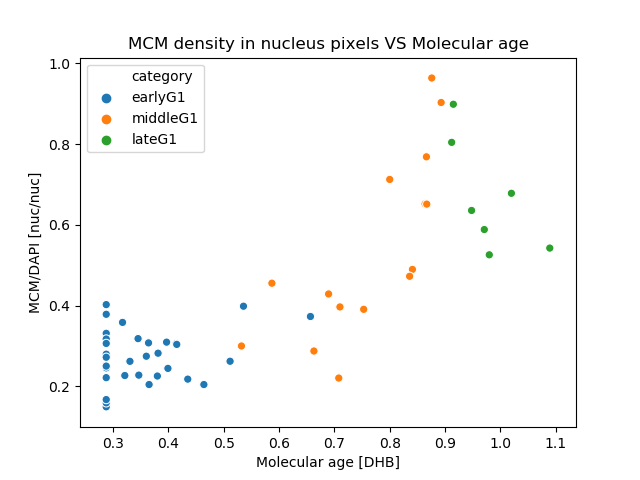

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [17]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_total/orgdatasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


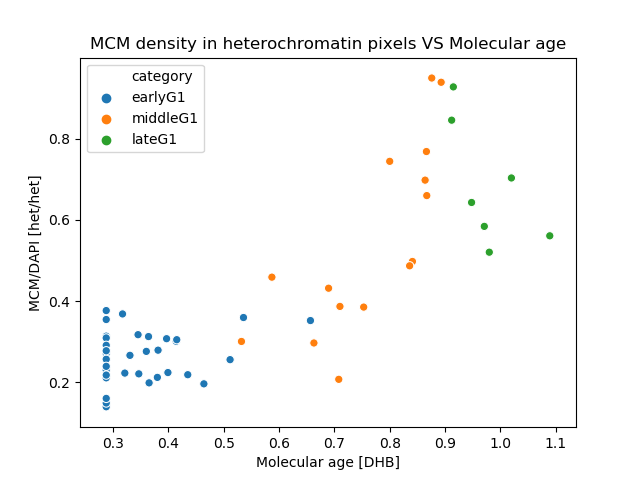

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [18]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_het/orgdatasel.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


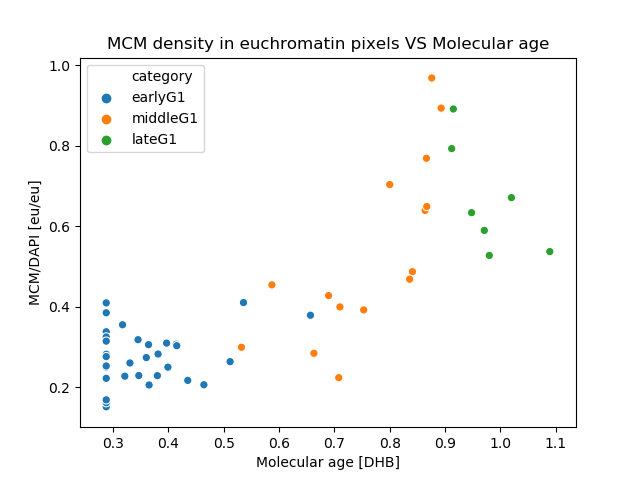

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [19]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_eu/orgdatasel.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


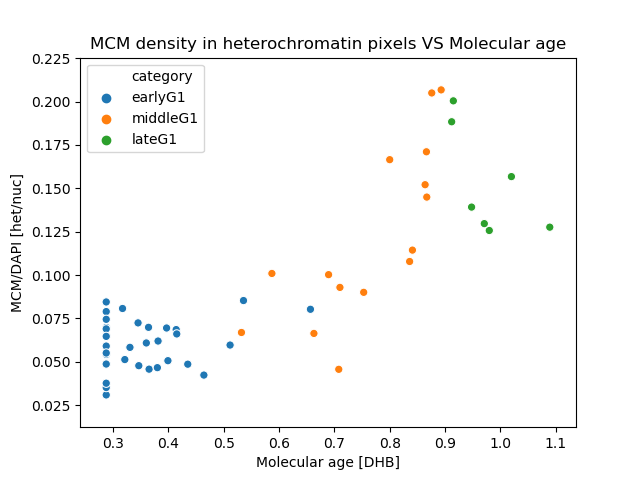

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [20]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_het/orgdatasel.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


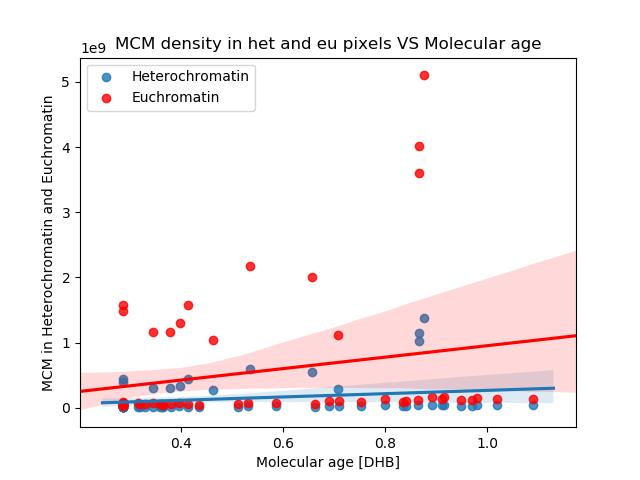

In [21]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.nuc_mcm_het
orgdatasel['temp2']=orgdatasel.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                            ['G1' in x for x in orgdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# inner core of the nucleus

## 11.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


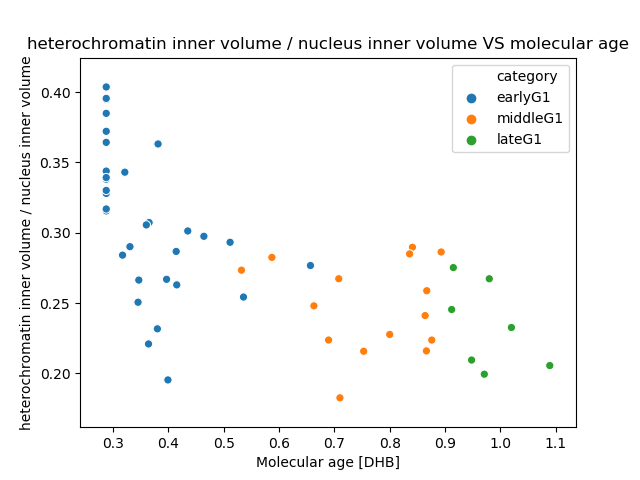

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [21]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_vol_het/orgdatasel.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 12. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


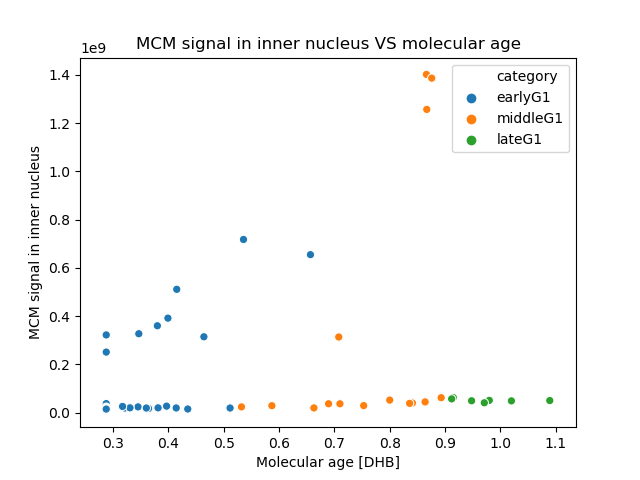

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [22]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 13. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


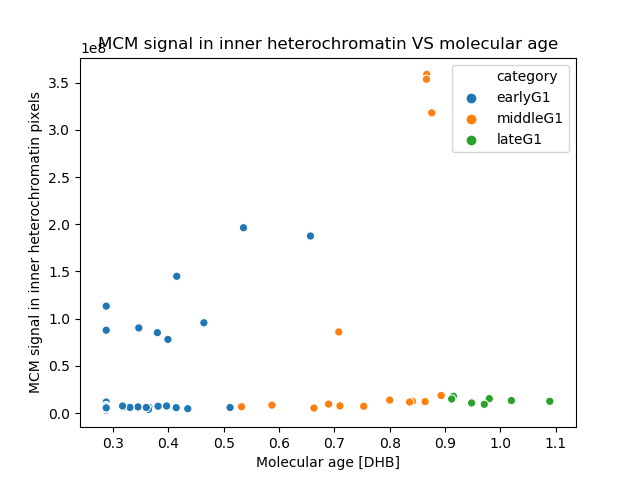

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [23]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 14. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


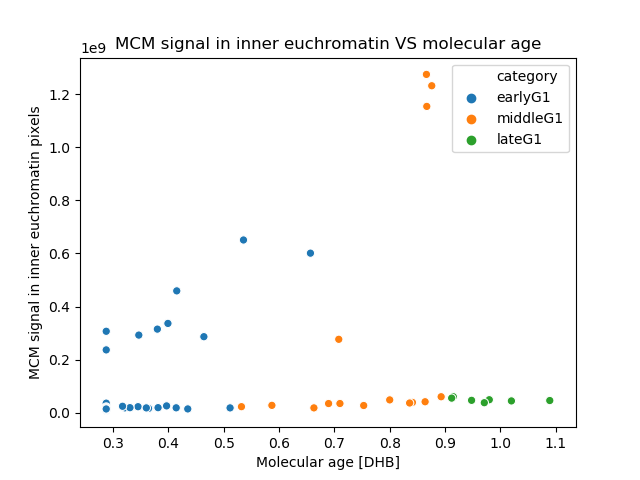

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [24]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 15.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


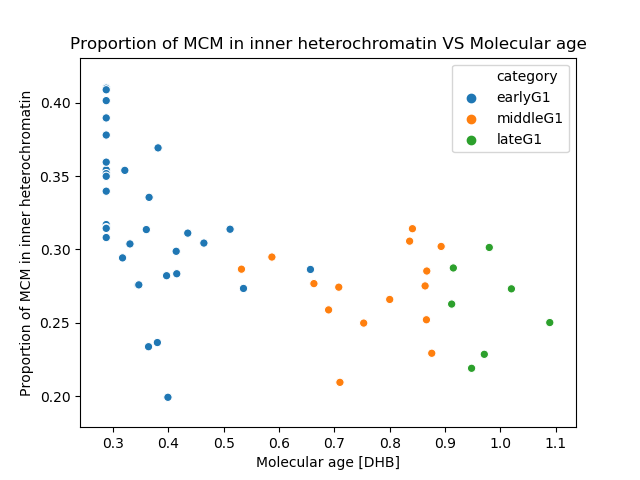

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [29]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_het/orgdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 16.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


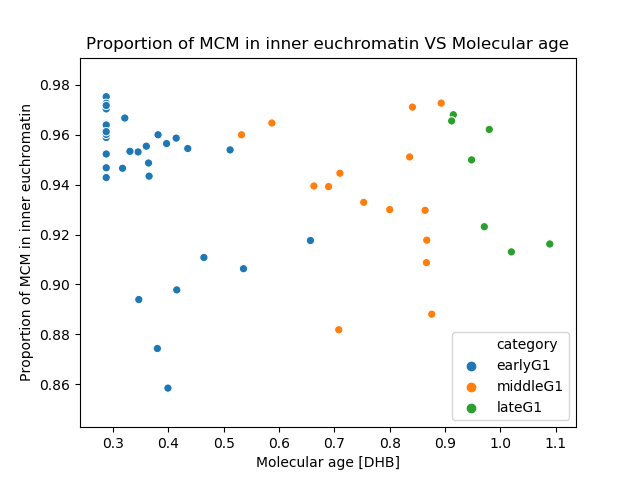

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [30]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_eu/orgdatasel.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 17.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


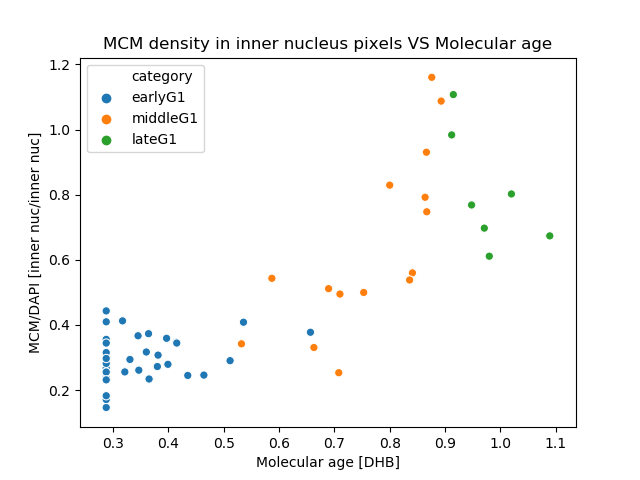

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [31]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_total/orgdatasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 18.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


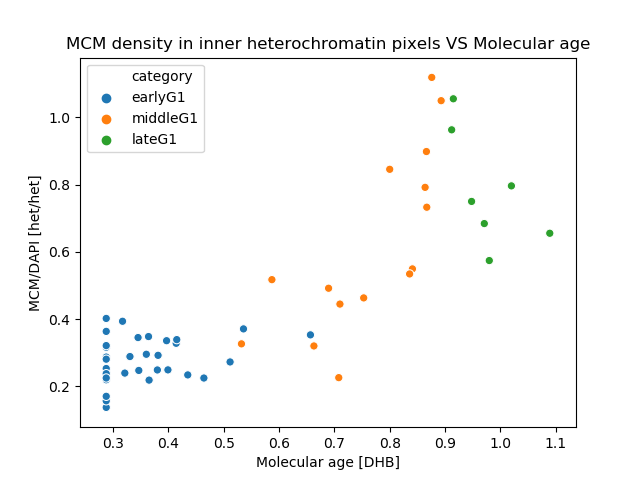

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [32]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_het/orgdatasel.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 19. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


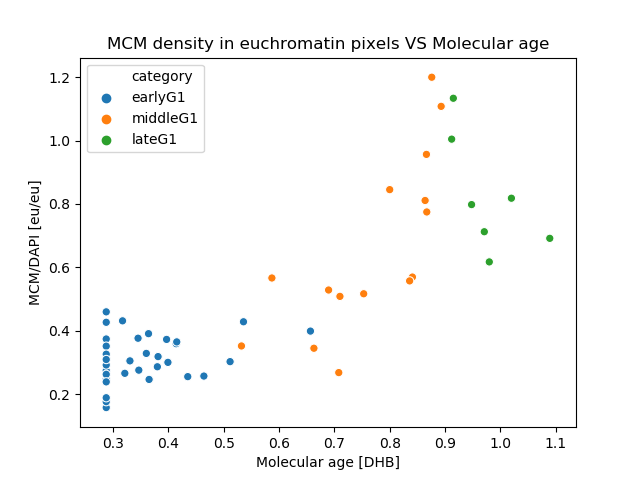

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [33]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_eu/orgdatasel.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 20. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


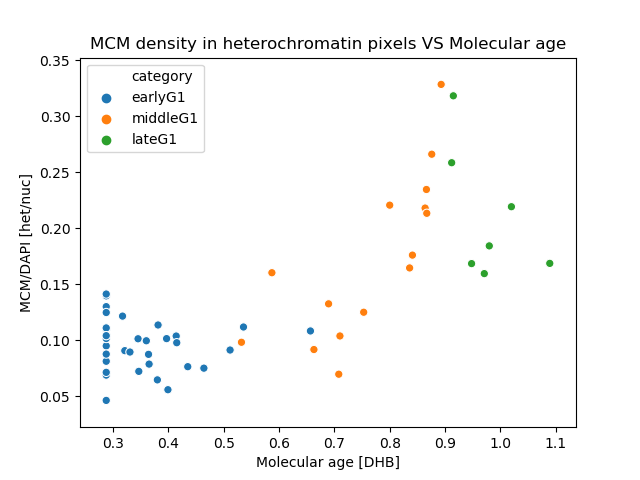

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [34]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_het/orgdatasel.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


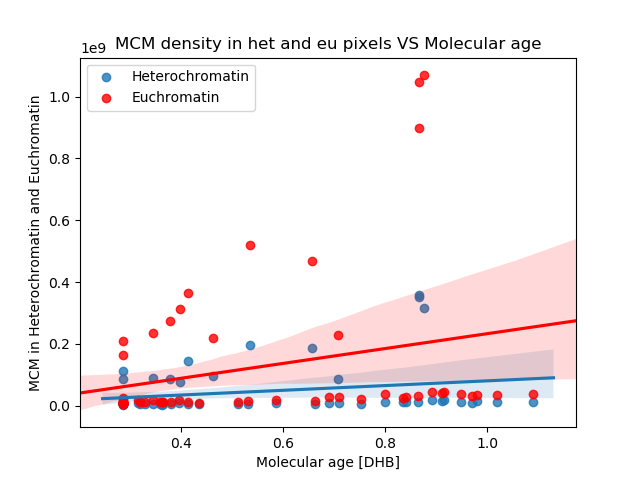

In [22]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.inner_mcm_het
orgdatasel['temp2']=orgdatasel.inner_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                            ['G1' in x for x in orgdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# outer shell of the nucleus

## 21.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


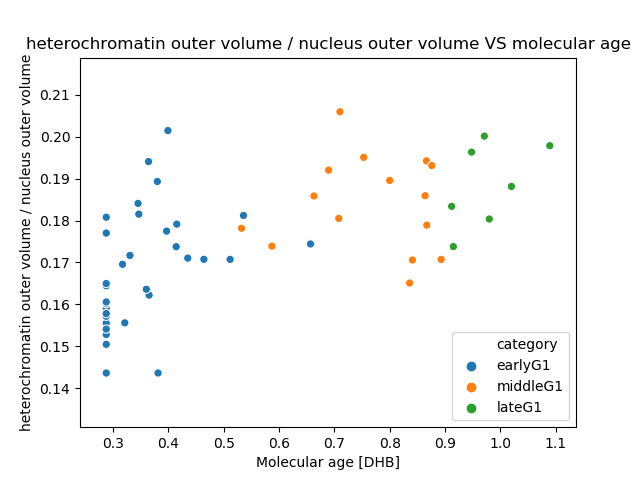

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [35]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_vol_het/orgdatasel.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 22. 	How is MCM signal in outer core changing with molecular age? 

<IPython.core.display.Javascript object>


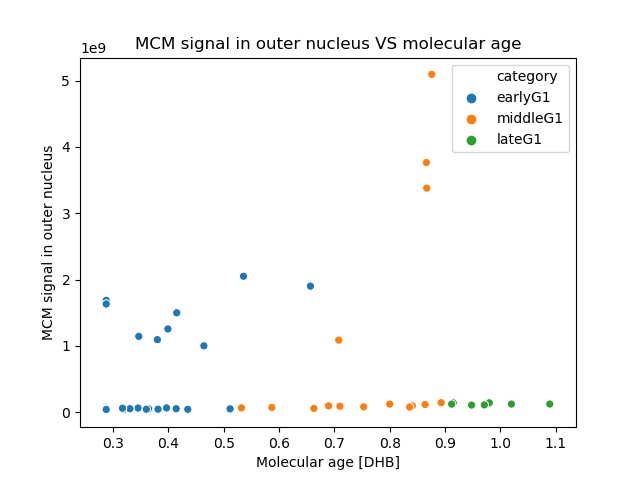

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [36]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 23. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


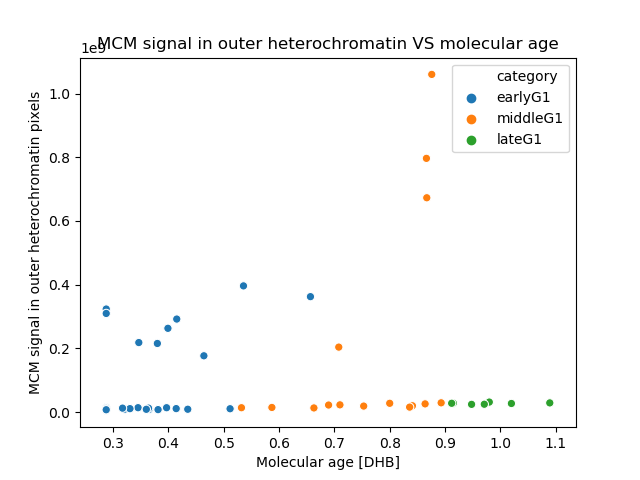

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [37]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 24. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


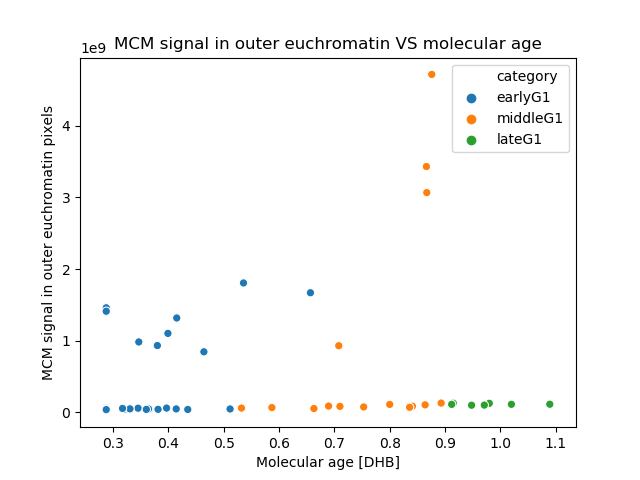

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [38]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 25.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


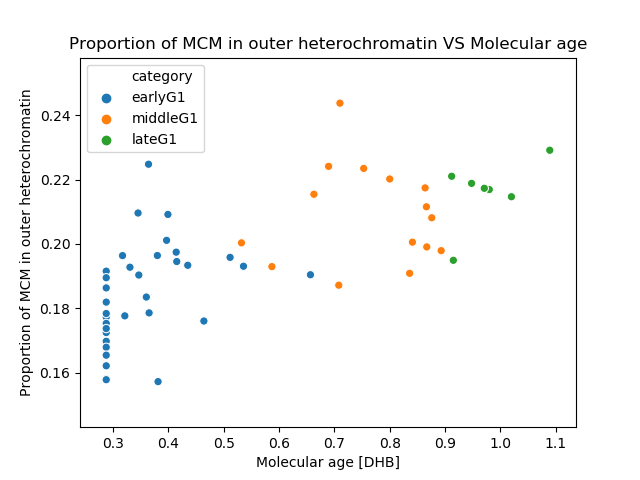

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [39]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_het/orgdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 26.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


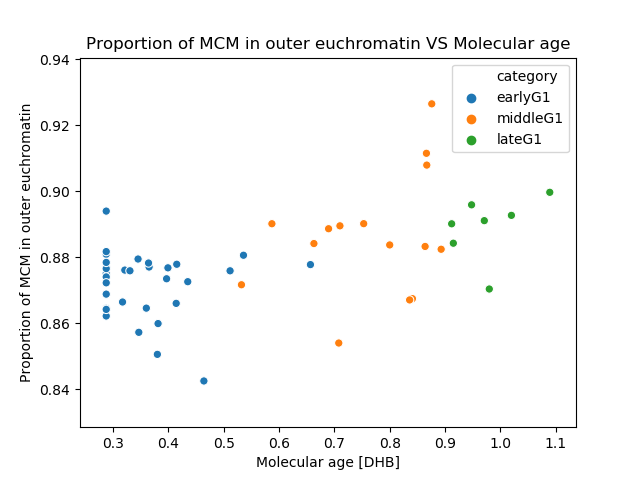

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [40]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_eu/orgdatasel.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 27.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


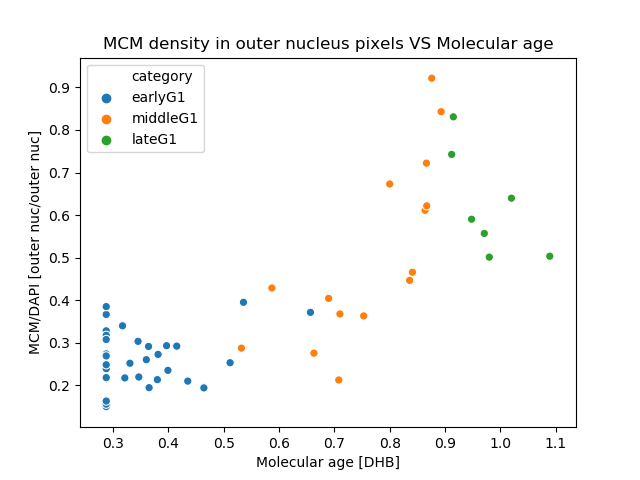

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [41]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_total/orgdatasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 28.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


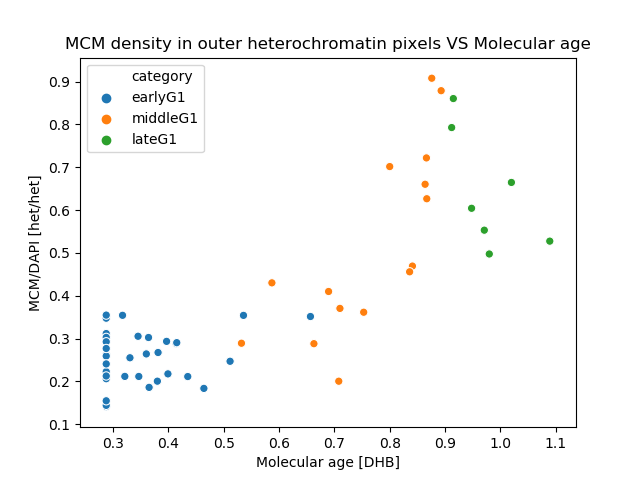

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [42]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_het/orgdatasel.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 29. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


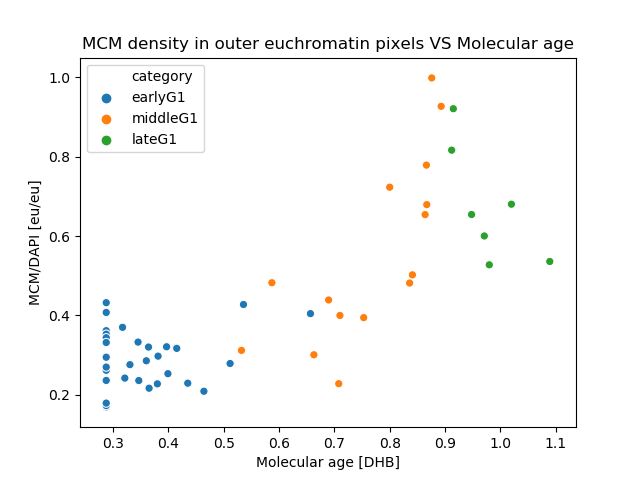

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [43]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_eu/orgdatasel.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

## 30. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


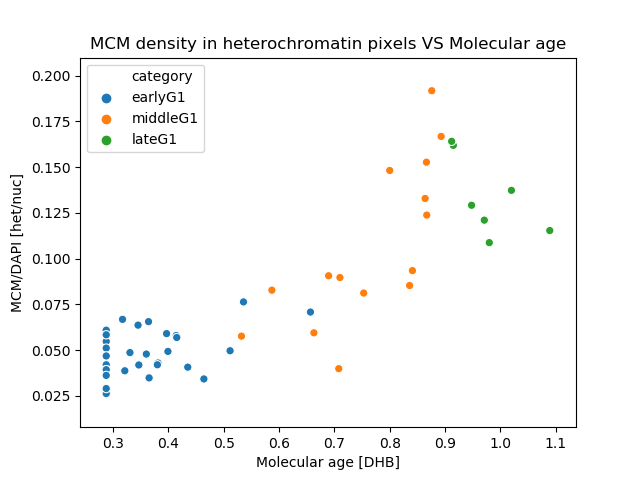

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [44]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_het/orgdatasel.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


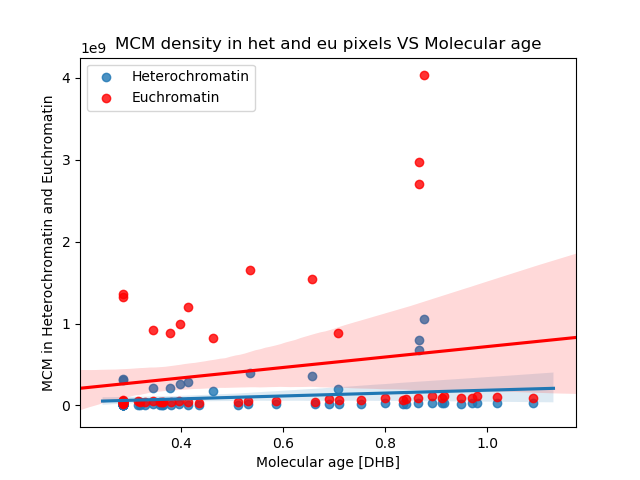

In [23]:
%matplotlib notebook
orgdatasel['temp']=orgdatasel.outer_mcm_het
orgdatasel['temp2']=orgdatasel.outer_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                           ['G1' in x for x in orgdatasel.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatasel.loc[((orgdatasel.day!='d20190625') & (orgdatasel.day!='d201907012') &
                                                            ['G1' in x for x in orgdatasel.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# non-deconvolved

## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


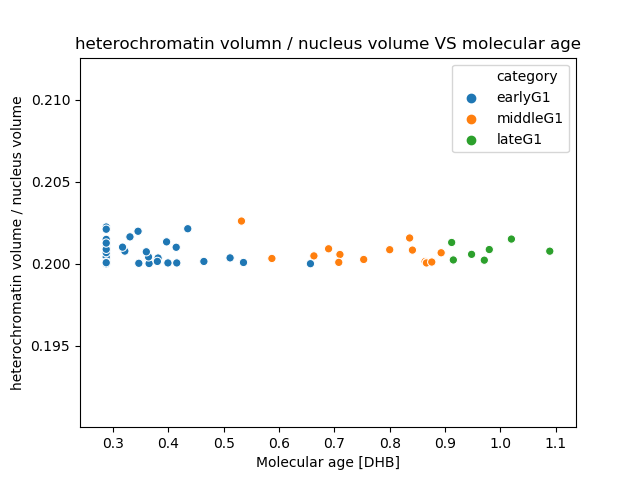

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age')

In [45]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_vol_het/orgdatand.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age')

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


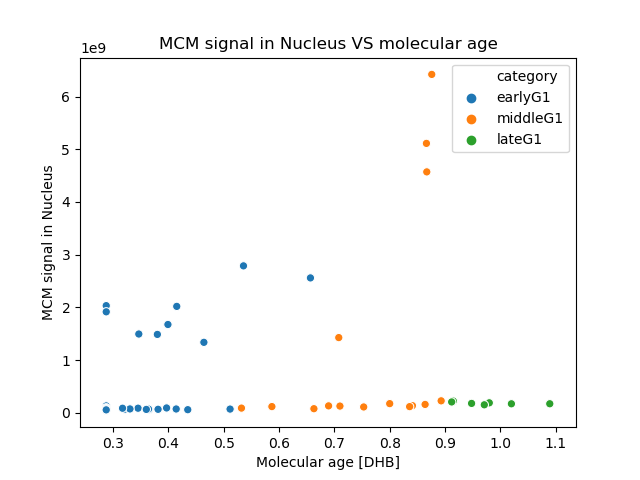

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [46]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age')

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


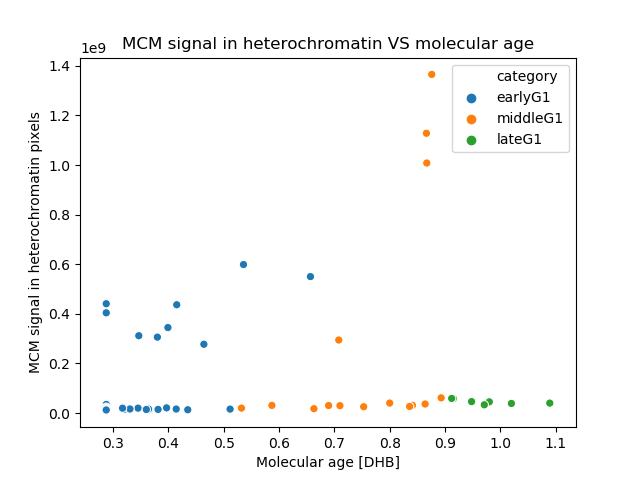

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [47]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age')

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


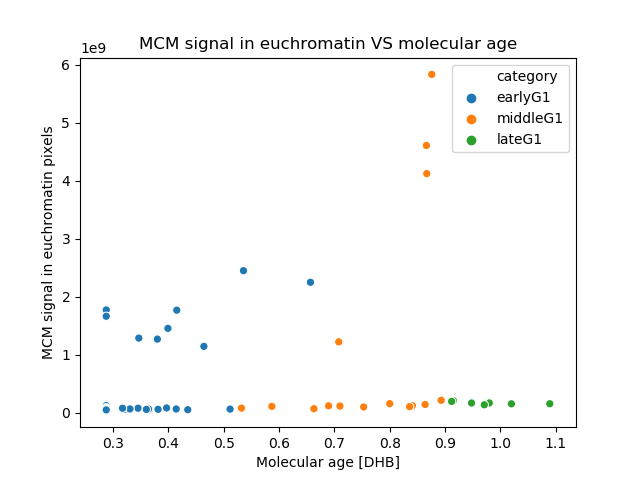

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [48]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age')

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


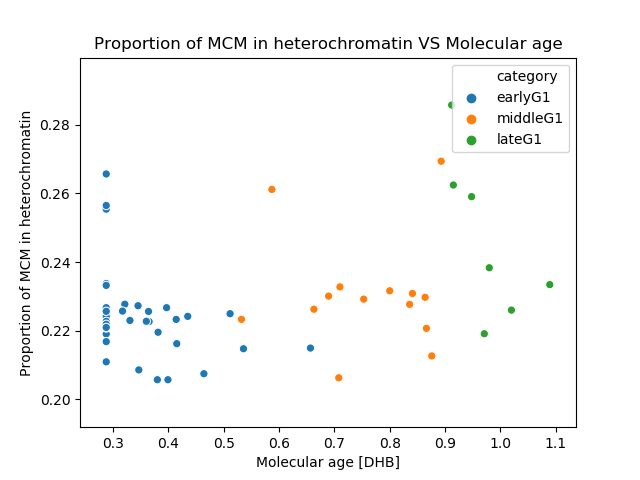

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [49]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_het/orgdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age')

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


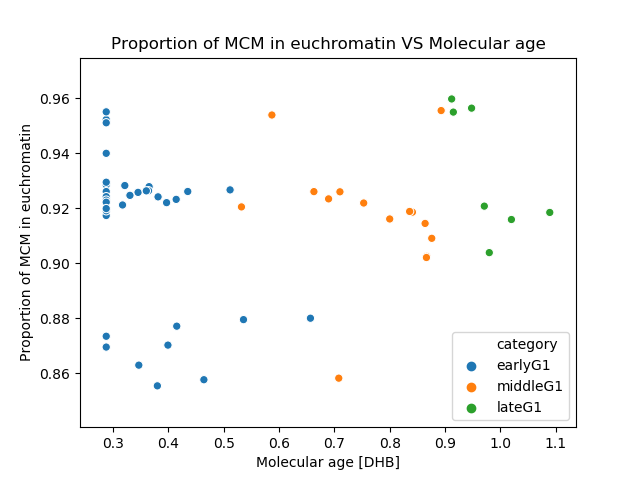

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [50]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_eu/orgdatand.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age')

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


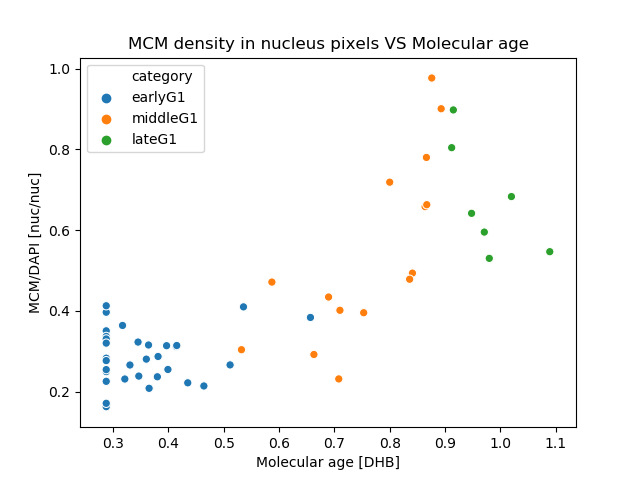

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [51]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_total/orgdatand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age')

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


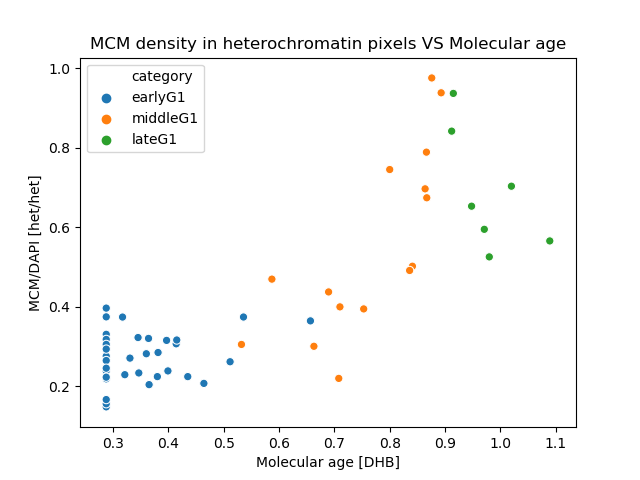

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [52]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_het/orgdatand.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


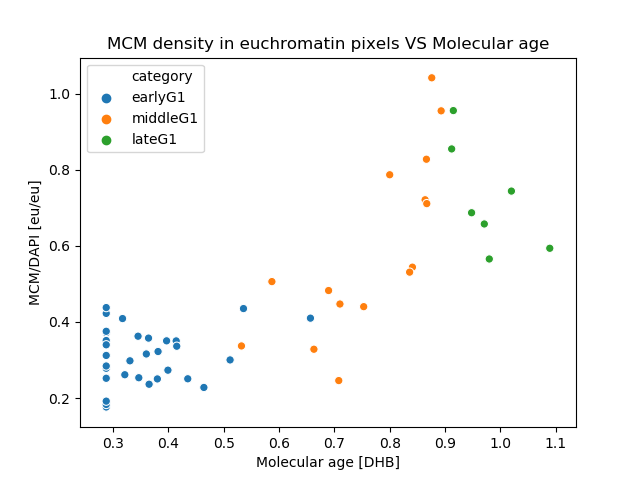

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [53]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_eu/orgdatand.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


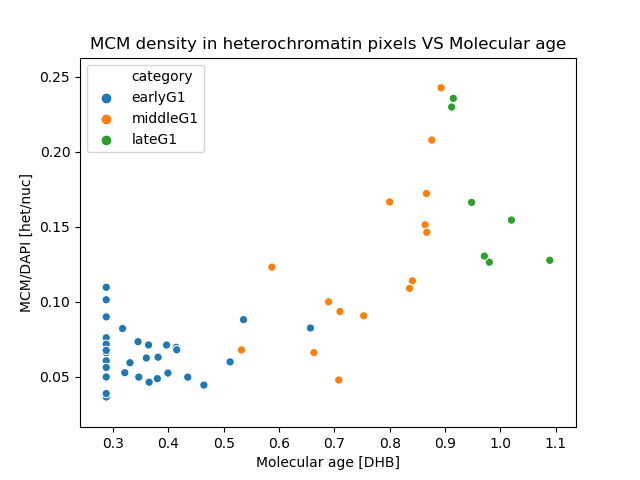

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [54]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_het/orgdatand.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


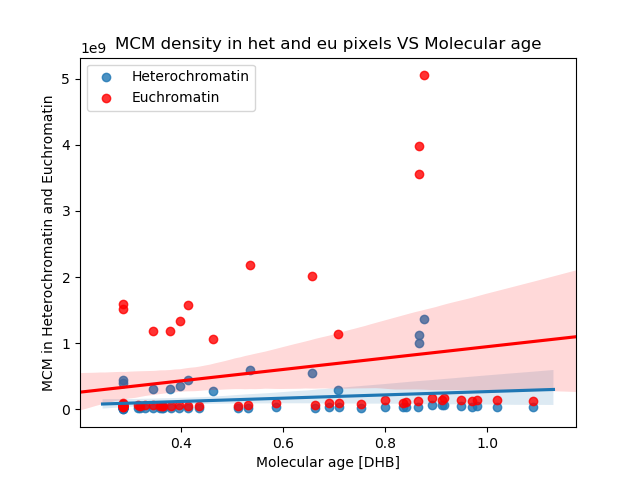

In [24]:
%matplotlib notebook
orgdatand['temp']=orgdatand.nuc_mcm_het
orgdatand['temp2']=orgdatand.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                            ['G1' in x for x in orgdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# inner core of the nucleus

## 11.	How is heterochromtin/nucleus inner volume changing with molecular age?

<IPython.core.display.Javascript object>


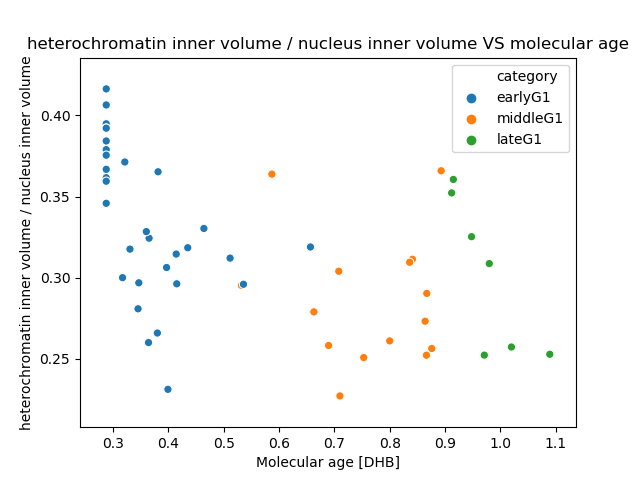

Text(0.5, 1.0, 'heterochromatin inner volume / nucleus inner volume VS molecular age')

In [55]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_vol_het/orgdatand.inner_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin inner volume / nucleus inner volume')
plt.title('heterochromatin inner volume / nucleus inner volume VS molecular age')

## 12. 	How is MCM signal in inner core changing with molecular age? 

<IPython.core.display.Javascript object>


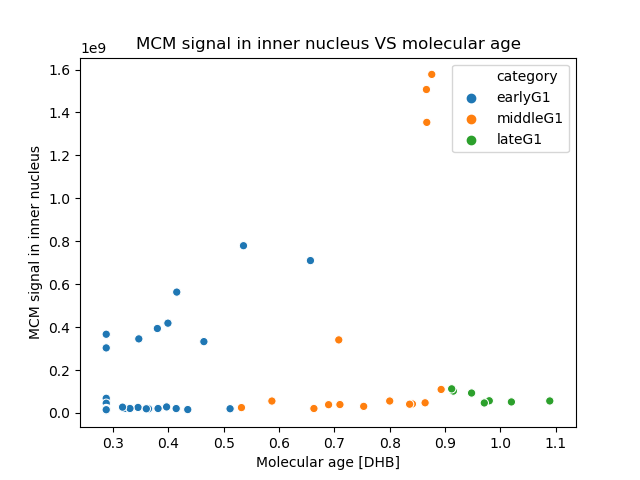

Text(0.5, 1.0, 'MCM signal in inner nucleus VS molecular age')

In [56]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_total',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner nucleus')
plt.title('MCM signal in inner nucleus VS molecular age')

## 13. 	How is MCM signal changing in inner heterochromatin with molecular age?

<IPython.core.display.Javascript object>


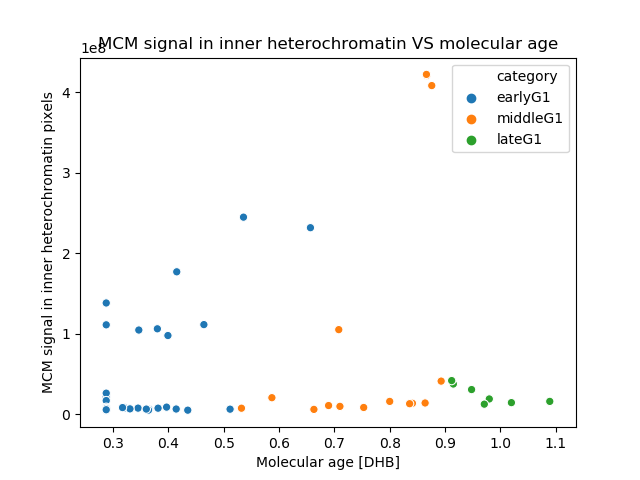

Text(0.5, 1.0, 'MCM signal in inner heterochromatin VS molecular age')

In [57]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_het',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner heterochromatin pixels')
plt.title('MCM signal in inner heterochromatin VS molecular age')

## 14. 	How is MCM signal changing in inner euchromatin with molecular age?

<IPython.core.display.Javascript object>


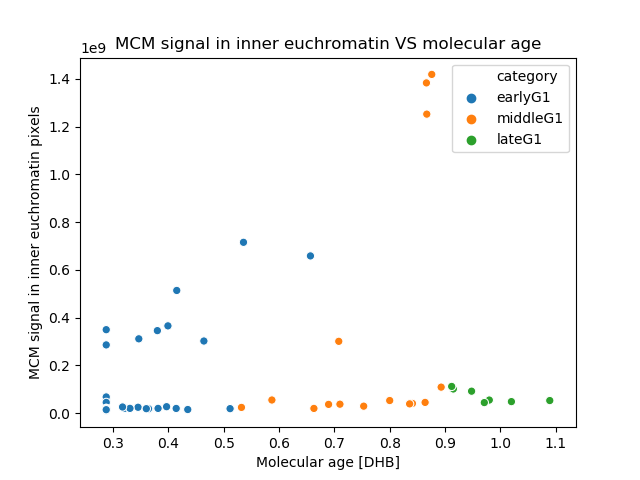

Text(0.5, 1.0, 'MCM signal in inner euchromatin VS molecular age')

In [58]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='inner_mcm_eu',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in inner euchromatin pixels')
plt.title('MCM signal in inner euchromatin VS molecular age')

## 15.	How does a proportion of MCM loaded in inner heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


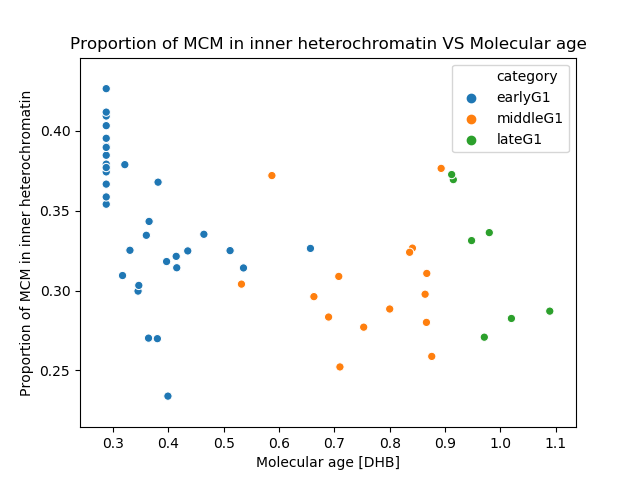

Text(0.5, 1.0, 'Proportion of MCM in inner heterochromatin VS Molecular age')

In [59]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_het/orgdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner heterochromatin')
plt.title('Proportion of MCM in inner heterochromatin VS Molecular age')

## 16.	How does a proportion of MCM loaded in inner euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


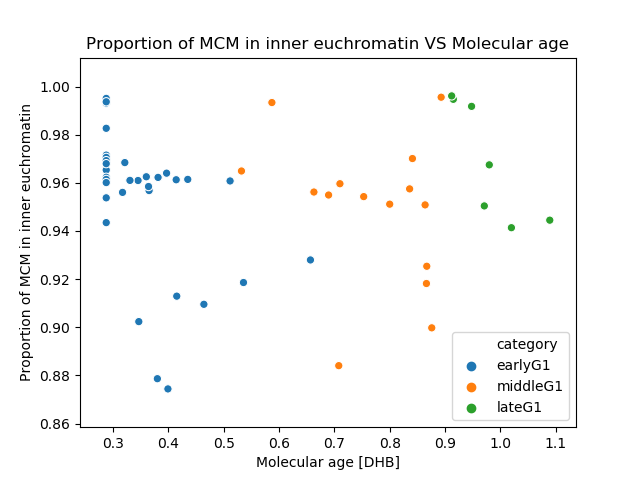

Text(0.5, 1.0, 'Proportion of MCM in inner euchromatin VS Molecular age')

In [60]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_eu/orgdatand.inner_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in inner euchromatin')
plt.title('Proportion of MCM in inner euchromatin VS Molecular age')

## 17.	How does MCM/DAPI in inner core changes in molecular time?

<IPython.core.display.Javascript object>


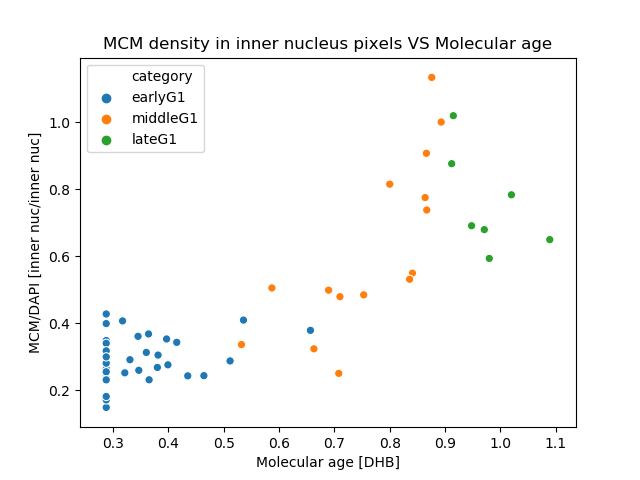

Text(0.5, 1.0, 'MCM density in inner nucleus pixels VS Molecular age')

In [61]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_total/orgdatand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [inner nuc/inner nuc]')
plt.title('MCM density in inner nucleus pixels VS Molecular age')

## 18.	How does MCM/DAPI changes in inner heterochromatin molecular time?

<IPython.core.display.Javascript object>


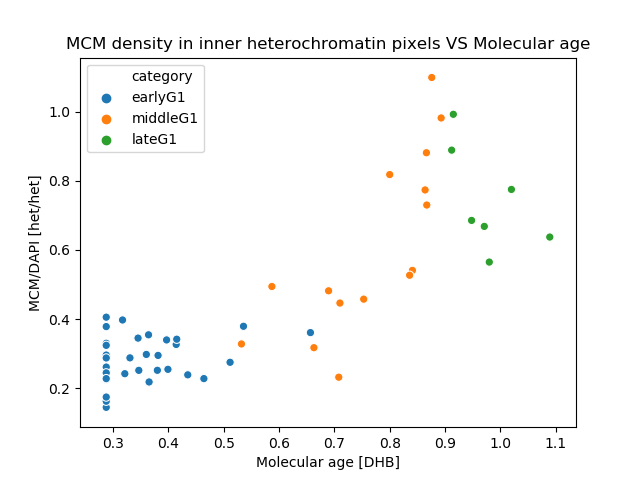

Text(0.5, 1.0, 'MCM density in inner heterochromatin pixels VS Molecular age')

In [62]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_het/orgdatand.inner_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in inner heterochromatin pixels VS Molecular age')

## 19. 	How does MCM/DAPI changes in inner euterochromatin molecular time?

<IPython.core.display.Javascript object>


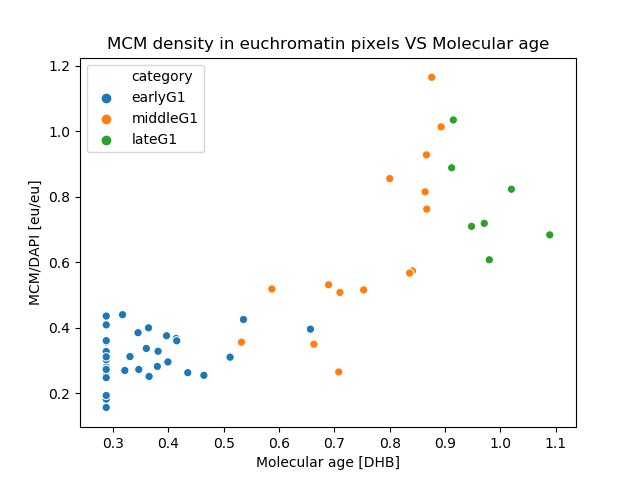

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [63]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_eu/orgdatand.inner_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age')

## 20. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


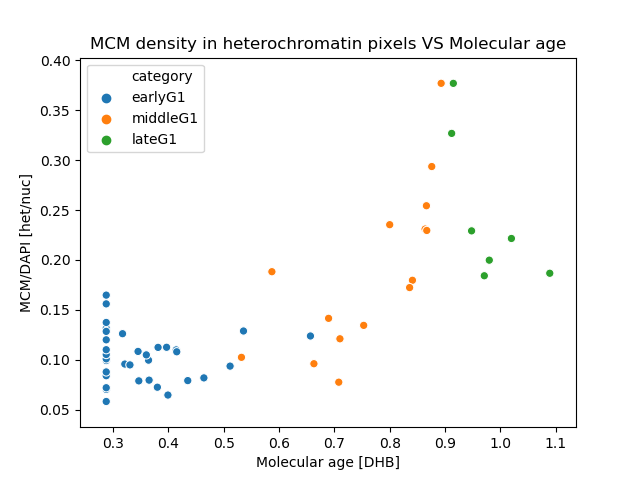

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [64]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_het/orgdatand.inner_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


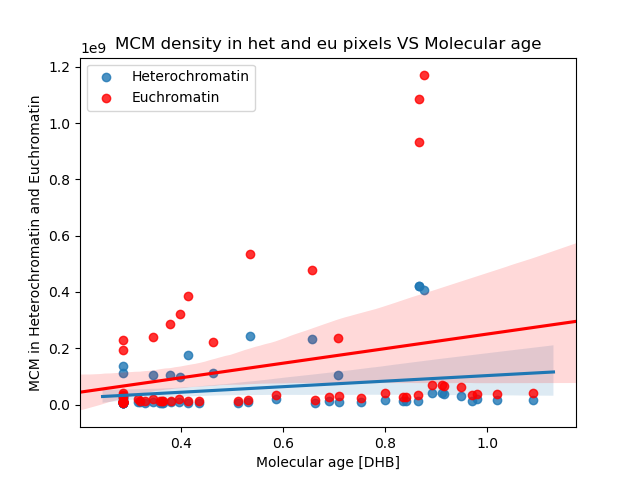

In [25]:
%matplotlib notebook
orgdatand['temp']=orgdatand.inner_mcm_het
orgdatand['temp2']=orgdatand.inner_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                            ['G1' in x for x in orgdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")



# outer shell of the nucleus

## 21.	How is heterochromtin/nucleus outer volume changing with molecular age?

<IPython.core.display.Javascript object>


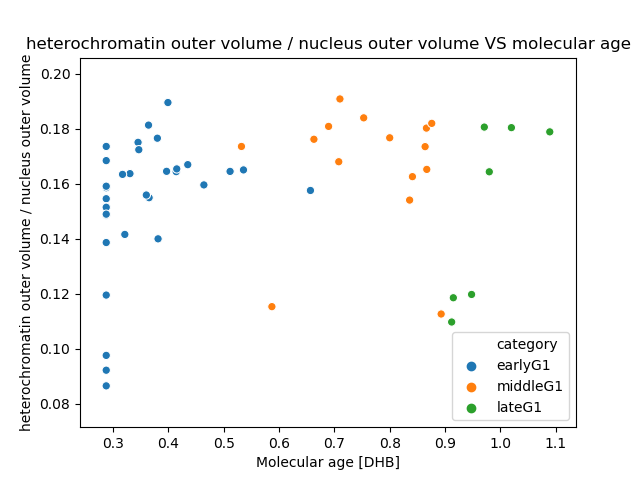

Text(0.5, 1.0, 'heterochromatin outer volume / nucleus outer volume VS molecular age')

In [65]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_vol_het/orgdatand.outer_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin outer volume / nucleus outer volume')
plt.title('heterochromatin outer volume / nucleus outer volume VS molecular age')

## 22. 	How is MCM signal in outer core changing with molecular age? 

<IPython.core.display.Javascript object>


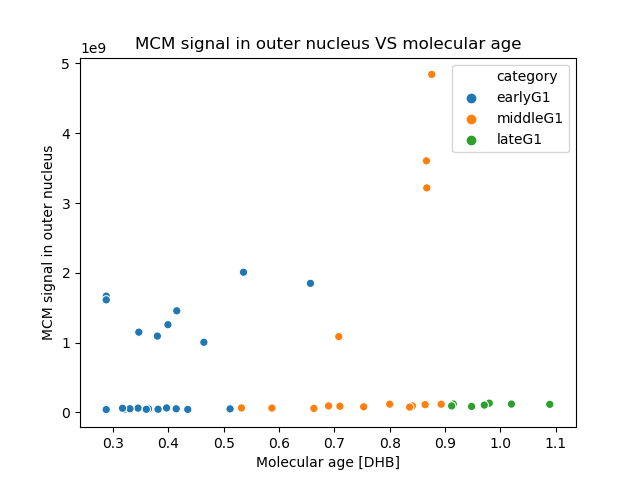

Text(0.5, 1.0, 'MCM signal in outer nucleus VS molecular age')

In [66]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_total',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer nucleus')
plt.title('MCM signal in outer nucleus VS molecular age')

## 23. 	How is MCM signal changing in outer heterochromatin with molecular age?

<IPython.core.display.Javascript object>


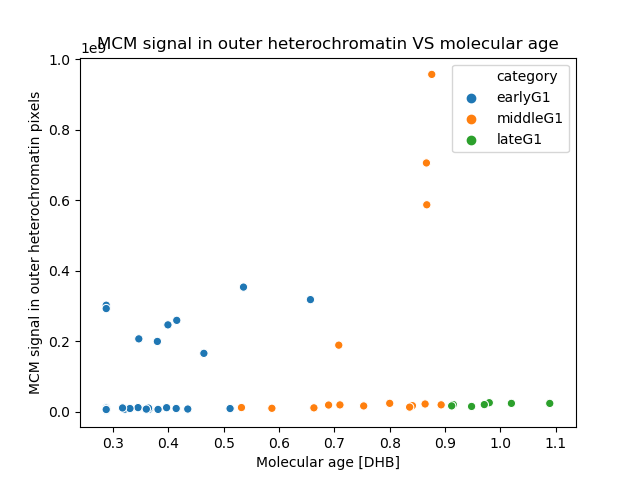

Text(0.5, 1.0, 'MCM signal in outer heterochromatin VS molecular age')

In [67]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_het',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer heterochromatin pixels')
plt.title('MCM signal in outer heterochromatin VS molecular age')

## 24. 	How is MCM signal changing in outer euchromatin with molecular age?

<IPython.core.display.Javascript object>


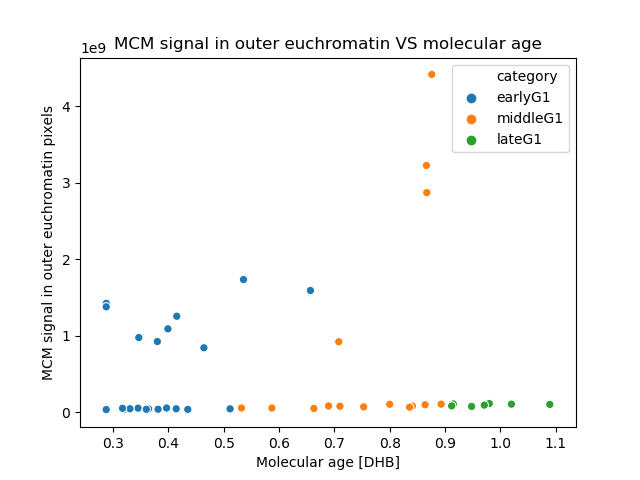

Text(0.5, 1.0, 'MCM signal in outer euchromatin VS molecular age')

In [68]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='outer_mcm_eu',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in outer euchromatin pixels')
plt.title('MCM signal in outer euchromatin VS molecular age')

## 25.	How does a proportion of MCM loaded in outer heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


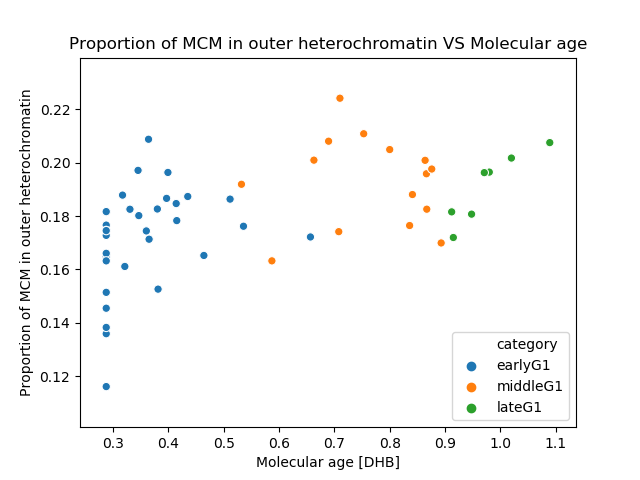

Text(0.5, 1.0, 'Proportion of MCM in outer heterochromatin VS Molecular age')

In [69]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_het/orgdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer heterochromatin')
plt.title('Proportion of MCM in outer heterochromatin VS Molecular age')

## 26.	How does a proportion of MCM loaded in outer euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


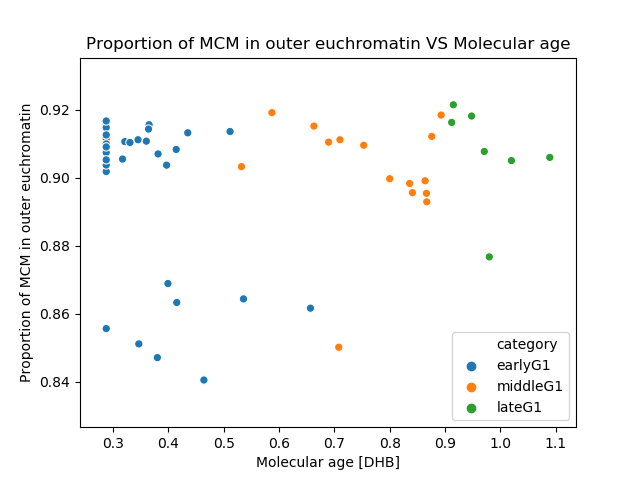

Text(0.5, 1.0, 'Proportion of MCM in outer euchromatin VS Molecular age')

In [70]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_eu/orgdatand.outer_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in outer euchromatin')
plt.title('Proportion of MCM in outer euchromatin VS Molecular age')

## 27.	How does MCM/DAPI in outer shell changes in molecular time?

<IPython.core.display.Javascript object>


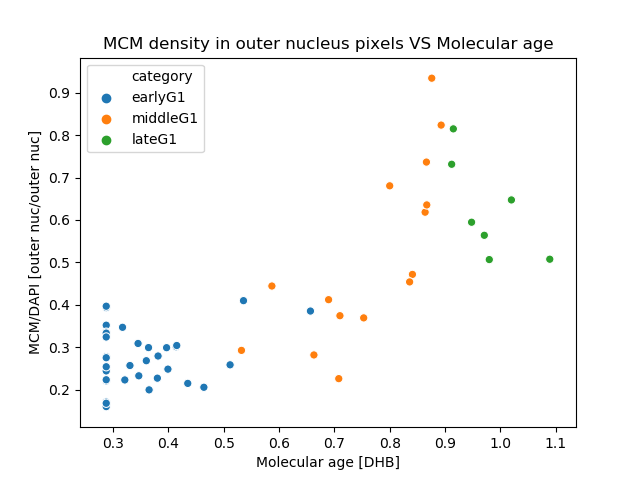

Text(0.5, 1.0, 'MCM density in outer nucleus pixels VS Molecular age')

In [71]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_total/orgdatand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [outer nuc/outer nuc]')
plt.title('MCM density in outer nucleus pixels VS Molecular age')

## 28.	How does MCM/DAPI changes in outer heterochromatin molecular time?

<IPython.core.display.Javascript object>


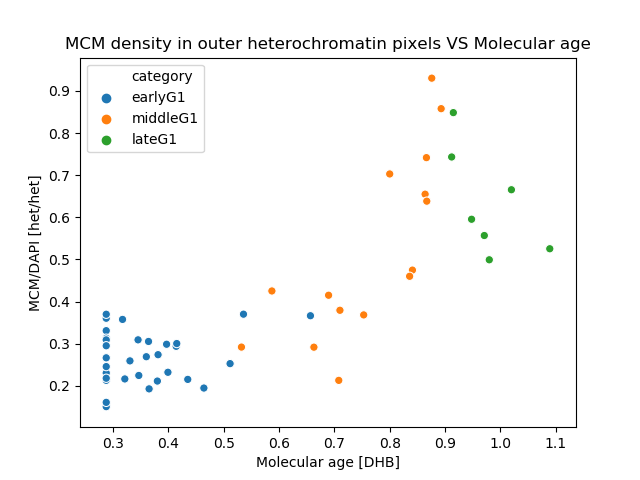

Text(0.5, 1.0, 'MCM density in outer heterochromatin pixels VS Molecular age')

In [72]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_het/orgdatand.outer_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in outer heterochromatin pixels VS Molecular age')

## 29. 	How does MCM/DAPI changes in outer euterochromatin molecular time?

<IPython.core.display.Javascript object>


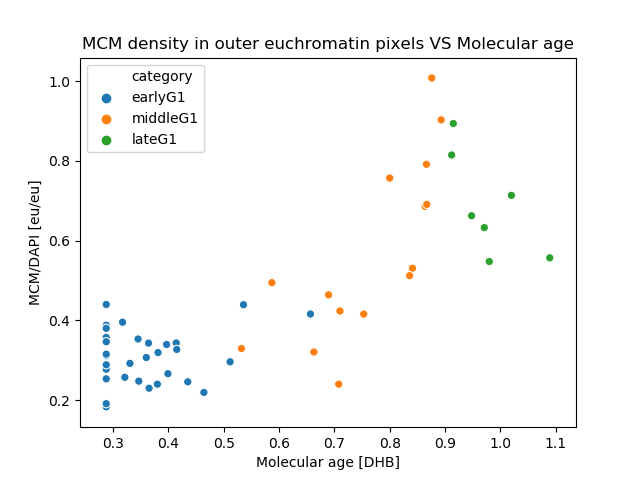

Text(0.5, 1.0, 'MCM density in outer euchromatin pixels VS Molecular age')

In [73]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_eu/orgdatand.outer_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in outer euchromatin pixels VS Molecular age')

## 30. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


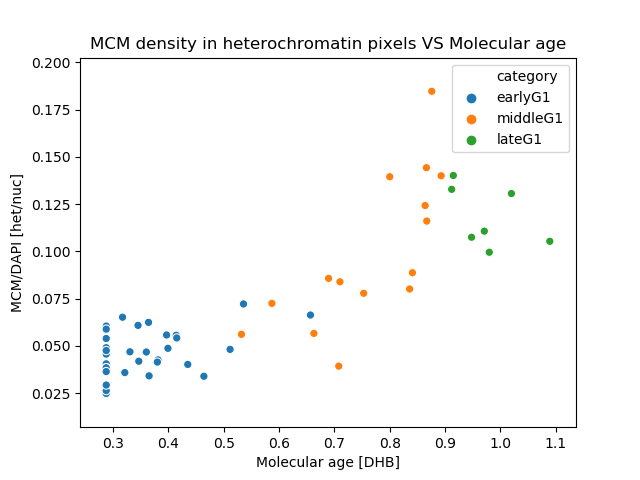

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [74]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_het/orgdatand.outer_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age')

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


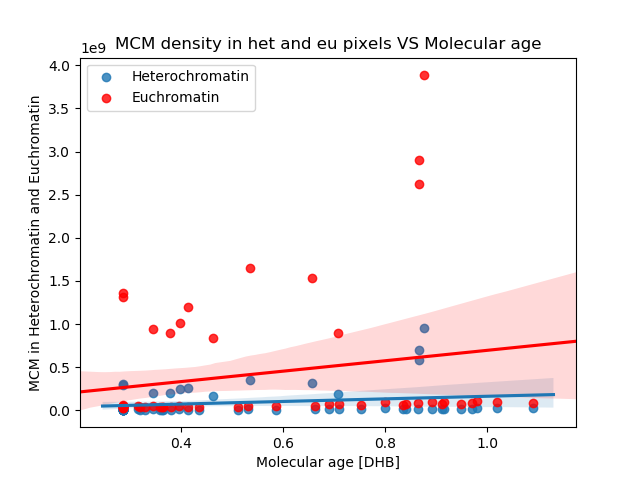

In [26]:
%matplotlib notebook
orgdatand['temp']=orgdatand.outer_mcm_het
orgdatand['temp2']=orgdatand.outer_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                           ['G1' in x for x in orgdatand.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=orgdatand.loc[((orgdatand.day!='d20190625') & (orgdatand.day!='d201907012') &
                                                            ['G1' in x for x in orgdatand.category]),:], color="r",
           label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age')
plt.legend(loc="upper left")

